<a href="https://colab.research.google.com/github/Sarahgrazie/Kaggle_1/blob/master/%ED%80%80%ED%8A%B8%ED%88%AC%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! pip install pykrx
! pip install requests
! pip install beautifulsoup4
! pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 21.1 MB/s eta 0:00:00


In [7]:
from pykrx import stock

# 코스피 상장 종목 코드 리스트 가져오기
tickers = stock.get_market_ticker_list(market="KOSPI")

In [8]:
kospi_name = []

# 종목 코드와 종목명 출력
for ticker in tickers:
    name = stock.get_market_ticker_name(ticker)
    kospi_name.append(name)

print(len(kospi_name))

962


In [9]:
#네이버 API 활용한 종목 뉴스 데이터 가져오기
from tqdm import tqdm
import pandas as pd

# 네이버 API 인증 정보
# 자신의 client_id, client_secret을 입력해주세요!
client_id = "WzeZYYa_So2tDvEfjBD6"
client_secret = "eC81UX9Yif"

import urllib.request
import json

naver_API_df = pd.DataFrame(columns=['company', 'title', 'link', 'description', 'pubDate'])

for kospi in tqdm(kospi_name):
    # 검색할 키워드 설정 (UTF-8 인코딩)
    encText = urllib.parse.quote(kospi)

    # 뉴스 검색 API URL 설정 (날짜순 정렬, 10개의 기사 요청)
    url = "https://openapi.naver.com/v1/search/news?query=" + encText + "&display=10&sort=sim"  # 정확도순, 10개의 기사

    # API 요청 설정
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)

    # API 호출 및 응답 처리
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read().decode('utf-8')

        # JSON 데이터를 파싱
        news_data = json.loads(response_body)

        # 각 뉴스 아이템에서 필요한 정보를 추출하고 출력
        for item in news_data['items']:
            title = item['title'].replace('<b>', '').replace('</b>', '')  # HTML 태그 제거
            link = item['link']
            description = item['description'].replace('<b>', '').replace('</b>', '')
            pubDate = item['pubDate']

            # 저장
            naver_API_df.loc[len(naver_API_df)] = [kospi, title, link, description, pubDate]

    else:
        print("Error Code:" + str(rescode))

naver_API_df.to_csv('뉴스API.csv', index=False, encoding='utf-8-sig')

100%|██████████| 962/962 [06:58<00:00,  2.30it/s]


In [31]:
!apt-get update -qq
!apt-get install -y fonts-nanum


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 100 not upgraded.


In [37]:
import matplotlib.font_manager as fm
font_paths = [f for f in fm.findSystemFonts(fontpaths=None) if 'NanumGothic' in f]
print(font_paths)


['/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf']


In [38]:
wordcloud.to_file("wordcloud_output.png")


In [35]:
import os
print(os.path.exists('NanumGothic.ttf'))  # True여야 함


False


In [3]:
from konlpy.tag import Okt

In [4]:
!pip install pandas konlpy wordcloud matplotlib > /dev/null

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Libraries and fonts installed.
Libraries imported.
경고: Naver API Client ID와 Secret을 실제 값으로 변경했는지 확인해주세요.
현재 코드에 있는 값(WzeZYYa..., eC81U...)이 placeholder일 수 있습니다.
만약 위 값이 실제 사용하시는 키라면 이 경고는 무시하셔도 됩니다.

Fetching KOSPI company list...
Found 962 KOSPI tickers. (Processing a subset if limited for testing)
Processing 962 company names.

Fetching news from Naver API...


Fetching News: 100%|██████████| 962/962 [06:54<00:00,  2.32it/s]



Successfully fetched 9620 news articles and saved to 뉴스API.csv

Generating word cloud from: 뉴스API.csv
Successfully loaded '뉴스API.csv' with 9620 rows.
--- DataFrame Head ---
  company                                    title  \
0  AJ네트웍스           AJ네트웍스, 서울 양진초에 'AJ교실숲' 제4호 조성   
1  AJ네트웍스           AJ네트웍스, 서울 양진초에 ‘AJ교실숲’ 제4호 조성   
2  AJ네트웍스          ﻿AJ네트웍스, 서울 양진초에 'AJ교실숲' 제4호 조성   
3  AJ네트웍스           AJ네트웍스, 서울 양진초에 'AJ교실숲' 제4호 조성   
4  AJ네트웍스  AJ네트웍스, 'AJ교실숲' 프로젝트 4년째...ESG 몸소 실천 나서   

                                                link  \
0  https://n.news.naver.com/mnews/article/003/001...   
1  https://n.news.naver.com/mnews/article/018/000...   
2  https://daily.hankooki.com/news/articleView.ht...   
3  https://www.klnews.co.kr/news/articleView.html...   
4  https://www.hellot.net/news/article.html?no=10...   

                                         description  \
0  AJ네트웍스는 서울 광진구 양진초에 친환경 녹색 교실인 'AJ교실숲' 제4호를 조성...   
1  AJ네트웍스(095570)가 서울 광진구 양진초등학교에 친환경 녹색 교실인 ‘AJ교...

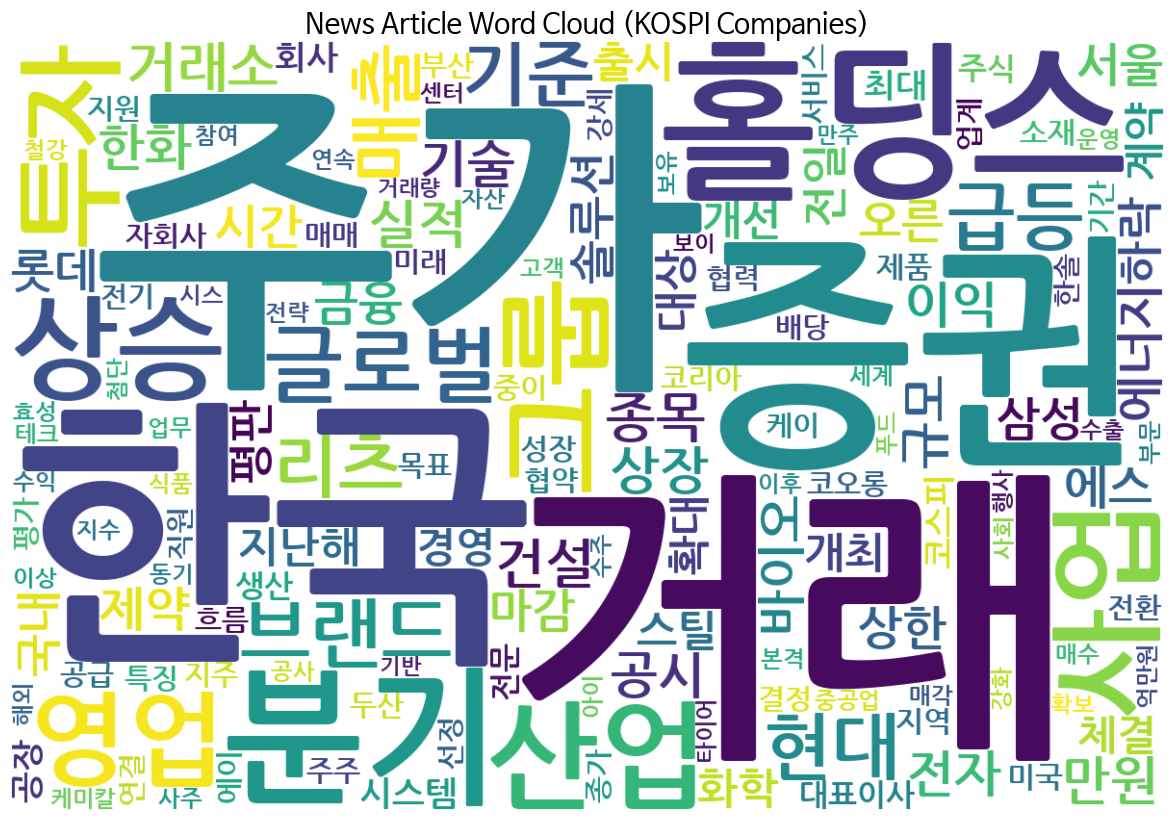


Word cloud should be displayed above.

Script finished.


In [5]:
# Step 0: Install necessary libraries
# ------------------------------------
!pip install pykrx requests pandas konlpy wordcloud matplotlib > /dev/null
!apt-get update -qq
!apt-get install -y fonts-nanum* > /dev/null
print("Libraries and fonts installed.")

# Step 1: Import Libraries
# --------------------------
import pandas as pd
from pykrx import stock
from tqdm import tqdm
import urllib.request
import json
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import sys
import html # HTML 엔티티 처리를 위해 추가


from konlpy.tag import Okt
print("Libraries imported.")

# Step 2: Naver API Configuration
# ---------------------------------
# IMPORTANT: Replace with your actual Naver API credentials!
CLIENT_ID = "WzeZYYa_So2tDvEfjBD6"  # 실제 값으로 변경하세요
CLIENT_SECRET = "eC81UX9Yif"    # 실제 값으로 변경하세요

# API 키가 기본값인지 확인하는 로직은 유지합니다.
if CLIENT_ID == "YOUR_NAVER_CLIENT_ID" or CLIENT_SECRET == "YOUR_NAVER_CLIENT_SECRET" or \
   CLIENT_ID == "WzeZYYa_So2tDvEfjBD6" or CLIENT_SECRET == "eC81UX9Yif": # 여기에 실제 키를 넣으셨다면 이 경고는 안 뜹니다.
    # 만약 위 ID/Secret이 실제 사용하시는 것이라면, 아래 경고 조건에서 제거하셔도 됩니다.
    # 다만, 이 코드를 다른 사람에게 공유할 때는 다시 placeholder로 바꾸는 것이 좋습니다.
    print("="*50)
    print("경고: Naver API Client ID와 Secret을 실제 값으로 변경했는지 확인해주세요.")
    print("현재 코드에 있는 값(WzeZYYa..., eC81U...)이 placeholder일 수 있습니다.")
    print("만약 위 값이 실제 사용하시는 키라면 이 경고는 무시하셔도 됩니다.")
    print("="*50)


# Step 3: Fetch News Data from Naver API
# ----------------------------------------
def fetch_naver_news():
    print("\nFetching KOSPI company list...")
    try:
        tickers = stock.get_market_ticker_list(market="KOSPI")
        # 테스트 시에는 아래 주석을 해제하여 일부 티커만 사용하세요.
        # tickers = tickers[:5] # 예: 처음 5개 회사만
        print(f"Found {len(tickers)} KOSPI tickers. (Processing a subset if limited for testing)")
    except Exception as e:
        print(f"Error fetching KOSPI tickers: {e}")
        return None

    kospi_names = []
    for ticker in tickers:
        name = stock.get_market_ticker_name(ticker)
        if name:
            kospi_names.append(name)

    print(f"Processing {len(kospi_names)} company names.")

    naver_api_df = pd.DataFrame(columns=['company', 'title', 'link', 'description', 'pubDate'])
    news_fetched_count = 0

    print("\nFetching news from Naver API...")
    for company_name in tqdm(kospi_names, desc="Fetching News"):
        try:
            enc_text = urllib.parse.quote(company_name)
            url = f"https://openapi.naver.com/v1/search/news.json?query={enc_text}&display=10&sort=sim"

            request_obj = urllib.request.Request(url) # 변수명 변경 (request -> request_obj)
            request_obj.add_header("X-Naver-Client-Id", CLIENT_ID)
            request_obj.add_header("X-Naver-Client-Secret", CLIENT_SECRET)

            response = urllib.request.urlopen(request_obj, timeout=10)
            rescode = response.getcode()

            if rescode == 200:
                response_body = response.read().decode('utf-8')
                news_data = json.loads(response_body)

                for item in news_data.get('items', []):
                    # HTML 엔티티 디코딩 후 태그 제거
                    title = html.unescape(item.get('title', '')).replace('<b>', '').replace('</b>', '')
                    link = item.get('link', '')
                    description = html.unescape(item.get('description', '')).replace('<b>', '').replace('</b>', '')
                    pub_date = item.get('pubDate', '')

                    new_row = pd.DataFrame([{
                        'company': company_name,
                        'title': title,
                        'link': link,
                        'description': description,
                        'pubDate': pub_date
                    }])
                    naver_api_df = pd.concat([naver_api_df, new_row], ignore_index=True)
                    news_fetched_count += 1
            else:
                print(f"Error for {company_name}: Code {rescode}")

        except urllib.error.HTTPError as e:
            print(f"HTTPError for {company_name}: {e.code} - {e.reason}")
            if e.code == 401:
                print("API Key Error (401). Please check your Client ID and Secret.")
            elif e.code == 403:
                print("API Access Forbidden (403). Check API permissions or IP registration if required.")
            elif e.code == 429:
                print("API Rate Limit Exceeded (429). Try again later or reduce request frequency.")
        except urllib.error.URLError as e:
            print(f"URLError for {company_name}: {e.reason} (Could be network issue or invalid URL)")
        except json.JSONDecodeError:
            print(f"JSONDecodeError for {company_name}: Failed to parse API response.")
        except Exception as e:
            print(f"An unexpected error occurred for {company_name}: {e}")

    if not naver_api_df.empty:
        naver_api_df.to_csv('뉴스API.csv', index=False, encoding='utf-8-sig')
        print(f"\nSuccessfully fetched {news_fetched_count} news articles and saved to 뉴스API.csv")
    else:
        print("\nNo news articles were fetched. 뉴스API.csv was not created or is empty.")
    return '뉴스API.csv' if not naver_api_df.empty else None

# Step 4: Generate Word Cloud
# -----------------------------
def generate_word_cloud(csv_filepath):
    print(f"\nGenerating word cloud from: {csv_filepath}")

    # 4.1. Load the CSV file
    try:
        df = pd.read_csv(csv_filepath)
        if df.empty:
            print(f"The CSV file '{csv_filepath}' is empty. Cannot generate word cloud.")
            return
        print(f"Successfully loaded '{csv_filepath}' with {len(df)} rows.")
        print("--- DataFrame Head ---")
        print(df.head())
        print("\n--- DataFrame Info ---")
        df.info()

    except FileNotFoundError:
        print(f"Error: '{csv_filepath}' not found. Cannot generate word cloud.")
        return
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{csv_filepath}' is empty or not a valid CSV.")
        return
    except Exception as e:
        print(f"An error occurred while trying to load '{csv_filepath}': {e}")
        return

    # 4.2. Setup Korean Font
    font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
    korean_font_path = None
    for font_path_candidate in font_paths:
        if 'NanumGothic' in font_path_candidate or 'MalgunGothic' in font_path_candidate:
            korean_font_path = font_path_candidate
            break

    if korean_font_path:
        print(f"Using font: {korean_font_path}")
    else:
        default_colab_nanum_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        if os.path.exists(default_colab_nanum_path):
            korean_font_path = default_colab_nanum_path
            print(f"Using fallback font: {korean_font_path}")
        else:
            print("Korean font (NanumGothic or MalgunGothic) not found. Word cloud might not display Korean characters correctly.")

    # 4.3. Combine text from 'title' and 'description'
    text_corpus = ""
    if 'title' in df.columns:
        text_corpus += " ".join(df['title'].astype(str).fillna('').tolist())
    text_corpus += " " # 제목과 설명 사이에 공백 추가
    if 'description' in df.columns:
        text_corpus += " ".join(df['description'].astype(str).fillna('').tolist())

    print(f"\n--- Text Corpus (first 500 chars) ---\n{text_corpus.strip()[:500]}")

    if not text_corpus.strip():
        print("No text found in 'title' or 'description' columns. Cannot generate word cloud.")
        return

    # 4.4. Preprocess text
    text_corpus = re.sub(r'[^가-힣A-Za-z\s]', '', text_corpus)
    text_corpus = re.sub(r'\s+', ' ', text_corpus).strip()

    # 4.5. Tokenize and extract nouns
    try:
        okt = Okt()
        nouns = okt.nouns(text_corpus)
        print(f"\n--- Extracted Nouns (first 50) ---\n{nouns[:50]}")
    except Exception as e:
        print(f"Error during KoNLPy noun extraction: {e}")
        print("Ensure KoNLPy and its dependencies (like Java) are correctly installed.")
        return

    # 4.6. Remove stopwords
    stopwords = set([
        '것', '수', '이', '그', '저', '등', '및', '와', '과', '도', '를', '으로', '자', '에', '하다',
        '위해', '대한', '통해', '때문', '관련', '따르면', '지난', '올해', '기자', '뉴스', '사진',
        '밝혔다', '밝혀', '예정', '오전', '오후', '부터', '까지', '네이버', '카카오', '연합뉴스',
        '데일리', '제공', '무단', '전재', '재배포', '금지', '일보', '경제', '전자신문', '조선',
        '중앙', '동아', '매일경제', '한국경제', '오늘', '내일', '이번', '최근', '현재', '지금',
        '먼저', '사실', '경우', '정도', '우리', '모든', '면서', '부분', '내용', '가지', '하나',
        '억원', '기록', '대비', '증가', '감소', '달러', '뉴시스', '머니투데이', '파이낸셜뉴스',
        '대표', '회장', '사장', '관계자', '주요', '가운데', '시장', '기업', '업체', '분석',
        '발표', '설명', '확인', '전망', '기대', '결과', '계획', '추진', '진행', '개발',
        # 추가적인 일반 불용어
        '있다', '없다', '된다', '이다', '같다', '대한', '위한', '했다', '하는', '할', '그리고', '하지만',
        '그러나', '그래서', '또한', '역시', '따라', '같은', '한편', '가장', '매우', '더', '덜',
        '특히', '대해', '통한', '비롯한', '포함한', '포함해', '포함', '바로', '만약', '만일'
    ])
    if 'company' in df.columns:
         company_names_in_data = set(df['company'].astype(str).str.lower().unique())
         # stopwords.update(name.replace('(주)','').replace('주식회사','').strip() for name in company_names_in_data if len(name.strip()) > 1)


    filtered_nouns = [noun for noun in nouns if noun.lower() not in stopwords and len(noun) > 1]
    print(f"\n--- Filtered Nouns (first 50) ---\n{filtered_nouns[:50]}")


    if not filtered_nouns:
        print("No meaningful nouns found after filtering. Word cloud cannot be generated.")
        return

    # 4.7. Count word frequencies
    word_counts = Counter(filtered_nouns)
    print("\n--- Word Counts (Top 50) ---")
    for word, count in word_counts.most_common(50):
        print(f"{word}: {count}")

    if not word_counts:
        print("Word counts are empty. Cannot generate word cloud.")
        return

    # 4.8. Generate the Word Cloud
    try:
        wc = WordCloud(
            font_path=korean_font_path,
            width=1200,
            height=800,
            background_color='white',
            max_words=150,
            # colormap='viridis'
        )
        wc.generate_from_frequencies(dict(word_counts))

        # 4.9. Display the Word Cloud
        plt.figure(figsize=(15, 10))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title('News Article Word Cloud (KOSPI Companies)', fontsize=20)
        plt.show()
        print("\nWord cloud should be displayed above.")
    except Exception as e:
        print(f"Error generating or displaying word cloud: {e}")
        if korean_font_path is None or not os.path.exists(korean_font_path):
             print("Font path issue is highly suspected. `korean_font_path` might be None or invalid.")
        elif "cannot find font file" in str(e).lower() or "truetype" in str(e).lower():
            print("This is likely a font file issue. Ensure 'korean_font_path' points to a valid Korean TTF font accessible by the system.")


# Step 5: Main Execution
# ------------------------
if __name__ == '__main__':
    # Part 1: Fetch news and save to CSV
    # 이미 뉴스API.csv 파일이 있다면 이 부분을 주석 처리하고 실행할 수 있습니다.
    # tickers = tickers[:5] 와 같이 fetch_naver_news 함수 내에서 테스트용으로 제한하는 것을 권장합니다.
    csv_file_path = fetch_naver_news()

    # Part 2: Generate word cloud from the CSV
    if csv_file_path and os.path.exists(csv_file_path):
        generate_word_cloud(csv_file_path)
    elif os.path.exists('뉴스API.csv'): # fetch_naver_news가 None을 반환했지만 파일이 존재할 경우
        print("\nNews fetching might have failed or was skipped, but '뉴스API.csv' exists. Attempting to use it.")
        generate_word_cloud('뉴스API.csv')
    else:
        print("\n뉴스API.csv not found or was not created. Word cloud generation skipped.")

    print("\nScript finished.")